# Coursera Capstone

## Import library

In [1]:
import pandas as pd
import numpy as np
import os
import geocoder
import folium
import requests

## Installing Geocoder

In [2]:
!pip install geocoder

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importing BeautifulSoup Library
### Scrapping the table data from wikipedia page and saving it as a csv file

In [2]:
from bs4 import BeautifulSoup
import requests
x = "PostCode,Borough,Neighbourhood,Latitude,Logitutde\n"

### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [4]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(source,'lxml')
table = soup.find('table',class_ = 'wikitable sortable')
saveddata = ""
for row in table.find_all('tr'):
    newline = ""
    z=0
    for point in row.find_all('td'):
        if z == 1 and point.text == "Not assigned":
            newline=""
            break
        newline = newline+','+point.text
        z = z+1
    saveddata = saveddata+newline[1:]
print(saveddata)

M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M5A,Downtown Toronto,Regent Park
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Queen's Park,Not assigned
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Rouge
M1B,Scarborough,Malvern
M3B,North York,Don Mills North
M4B,East York,Woodbine Gardens
M4B,East York,Parkview Hill
M5B,Downtown Toronto,Ryerson
M5B,Downtown Toronto,Garden District
M6B,North York,Glencairn
M9B,Etobicoke,Cloverdale
M9B,Etobicoke,Islington
M9B,Etobicoke,Martin Grove
M9B,Etobicoke,Princess Gardens
M9B,Etobicoke,West Deane Park
M1C,Scarborough,Highland Creek
M1C,Scarborough,Rouge Hill
M1C,Scarborough,Port Union
M3C,North York,Flemingdon Park
M3C,North York,Don Mills South
M4C,East York,Woodbine Heights
M5C,Downtown Toronto,St. James Town
M6C,York,Humewood-Cedarvale
M9C,Etobicoke,Bloordale Gardens
M9C,Etobicoke,Eringate
M9C,Etobicoke,Markland Wood
M9C,Etobicoke,Old Burnhamthorpe
M1E,Scarborough,Guildwood
M1E,Sc

In [7]:
file = open(os.path.expanduser('capstone.csv'),'wb')
file.write(bytes(x,encoding='ascii',errors = 'ignore'))
file.write(bytes(saveddata,encoding='ascii',errors = 'ignore'))

6428

## Read csv file to Pandas DataFrame

In [2]:
dataframe = pd.read_csv('capstone.csv')
dataframe.head()

,PostCode,Borough,Neighbourhood,Latitude,Logitutde
0,M3A,North York,Parkwoods,NaN,NaN
1,M4A,North York,Victoria Village,NaN,NaN
2,M5A,Downtown Toronto,Harbourfront,NaN,NaN
3,M5A,Downtown Toronto,Regent Park,NaN,NaN
4,M6A,North York,Lawrence Heights,NaN,NaN


## Nothing Special here, it's just me trying geocoder and failing badly at it

In [ ]:
g = geocoder.google("M3A, North York,Parkwoods")

In [ ]:
lat_lng_coords = None
postal_code = 'M3A'
# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

## Improvising with the exel file from the course

In [3]:
geospatial_coordinates = pd.read_csv('Geospatial_Coordinates.csv')
geospatial_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Merging both the dataframes in a very non efficient way!

In [4]:
for i in range(0,dataframe['PostCode'].size):
    for j in range(0,geospatial_coordinates['Postal Code'].size):
        if dataframe['PostCode'][i] == geospatial_coordinates['Postal Code'][j]:
            dataframe['Latitude'][i] = geospatial_coordinates['Latitude'][j]
            dataframe['Logitutde'][i] = geospatial_coordinates['Longitude'][j]
dataframe.head(30)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PostCode,Borough,Neighbourhood,Latitude,Logitutde
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763
5,M6A,North York,Lawrence Manor,43.718518,-79.464763
6,M7A,Queen's Park,Not assigned,43.662301,-79.389494
7,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
8,M1B,Scarborough,Rouge,43.806686,-79.194353
9,M1B,Scarborough,Malvern,43.806686,-79.194353


## If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [5]:
dataframe.at[6,'Neighbourhood'] = dataframe.at[6,'Borough']
dataframe.head(7)

,PostCode,Borough,Neighbourhood,Latitude,Logitutde
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763
5,M6A,North York,Lawrence Manor,43.718518,-79.464763
6,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [8]:
writer = pd.ExcelWriter('output.xlsx')
dataframe.to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [2]:
dataframe = pd.read_excel('output.xlsx')

## Now using Folium and see a visual representation of the data on a map

In [3]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [10]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


# Help me figure out what the problem is...
# Why is the map not displaying when I try to add the circle marker to the map!?

In [24]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Borough as markers to map
for lat, lng, borough, neighborhood in zip(dataframe['Latitude'], dataframe['Logitutde'], dataframe['Borough'], dataframe['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

AttributeError: module 'folium.features' has no attribute 'CircleMarker'

## I Have run my code in IBM Cloud to get this right, for some reason the folium map with markers just doesn't seem to display in Anaconda.
### Here I have taken a screenshot of the output from IBM cloud notebook.
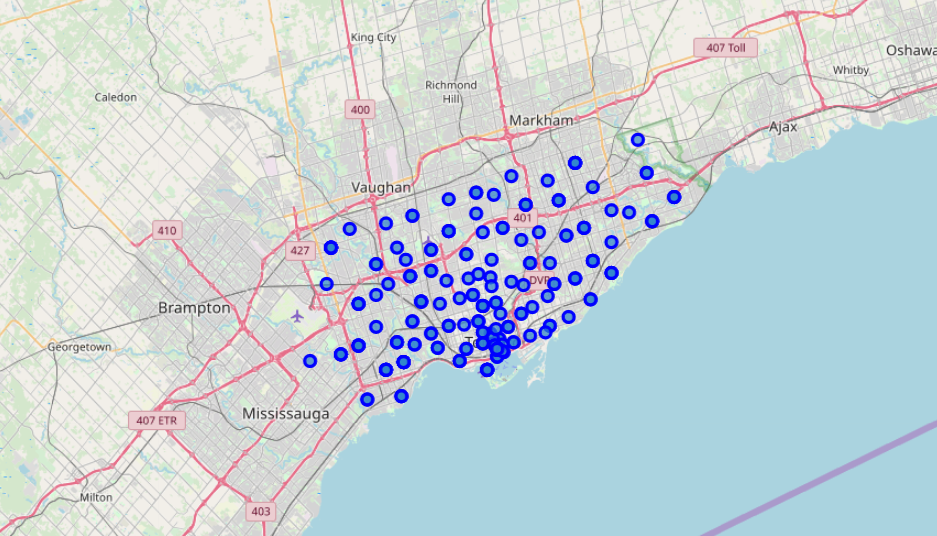

## Now Using FourSquare Api to get check what is there in this area...

In [5]:
CLIENT_ID = '02WD3TNDVCY10XG5KTZQP2HLLZCUV1KWKQSFAVOD5WLZC33P' # your Foursquare ID
CLIENT_SECRET = 'QCVKEKKAEKQTCX3JXVHNWZSNPYPGTDCYFGK2NHFXVKLQXOIV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 02WD3TNDVCY10XG5KTZQP2HLLZCUV1KWKQSFAVOD5WLZC33P
CLIENT_SECRET:QCVKEKKAEKQTCX3JXVHNWZSNPYPGTDCYFGK2NHFXVKLQXOIV


### Here I'm going search for market/Restaurant  within a kilometer reach for some random point in Toronto

In [8]:
locIndex = 30
latitude = dataframe.loc[locIndex,'Latitude']
longitude = dataframe.loc[locIndex,'Logitutde']
search = 'Hospital'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=02WD3TNDVCY10XG5KTZQP2HLLZCUV1KWKQSFAVOD5WLZC33P&client_secret=QCVKEKKAEKQTCX3JXVHNWZSNPYPGTDCYFGK2NHFXVKLQXOIV&ll=43.6435152,-79.57720079999999&v=20180604&query=Hospital&radius=10000&limit=30'

## Getting the result of the search query for the number of markets

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db5aa16018cbb002cfd8429'},
 'response': {'venues': [{'id': '4fe2fe18e4b0311209fab0cb',
    'name': 'Humber River Hospital',
    'location': {'address': '1215 Wilson Avenue',
     'lat': 43.7243374469061,
     'lng': -79.48806648987852,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.7243374469061,
       'lng': -79.48806648987852}],
     'distance': 11507,
     'postalCode': 'M3M 0B2',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1215 Wilson Avenue',
      'Toronto ON M3M 0B2',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1572186646',
    'hasPerk': False},
   {'id': '4b4f6095f964a520eb0327e3',
   

In [102]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4b611165f964a52085082ae3,Shell,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",v-1572173094,False,677 Burnhamthorpe Rd,43.642860,-79.576521,"[{'label': 'display', 'lat': 43.64286039072983...",91,M9C 2Z5,CA,Toronto,ON,Canada,"[677 Burnhamthorpe Rd, Toronto ON M9C 2Z5, Can...",NaN
1,4b017e51f964a520d84222e3,LCBO,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",v-1572173094,False,662 Burnhamthorpe Rd.,43.642099,-79.576592,"[{'label': 'display', 'lat': 43.64209869195962...",165,M9C 2Z4,CA,Etobicoke,ON,Canada,"[662 Burnhamthorpe Rd. (at Saturn Rd.), Etobic...",at Saturn Rd.
2,50fe8977e4b0a72cf5917c3d,MiWay Stop #9091,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",v-1572173094,False,Burnamthorpe,43.642701,-79.575782,"[{'label': 'display', 'lat': 43.6427009503196,...",145,NaN,CA,Toronto,ON,Canada,"[Burnamthorpe (The West Mall), Toronto ON, Can...",The West Mall
3,518fe5fd498e856a68311298,The Cat Car,"[{'id': '4f2a23984b9023bd5841ed2c', 'name': 'M...",v-1572173094,False,NaN,43.641939,-79.576235,"[{'label': 'display', 'lat': 43.641939, 'lng':...",191,NaN,CA,NaN,NaN,Canada,[Canada],NaN
4,4ba678e0f964a520fd5539e3,Treehorn's Parking Lot,[],v-1572173094,False,NaN,43.642598,-79.577043,"[{'label': 'display', 'lat': 43.642598, 'lng':...",102,NaN,CA,NaN,NaN,Canada,[Canada],NaN


In [103]:
filtered_columns = ['name', 'categories']+['location.lat','location.lng']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered['categories'].value_counts()

Doctor's Office       2
Café                  1
Piano Bar             1
Shopping Plaza        1
Clothing Store        1
Pharmacy              1
Convenience Store     1
Dentist's Office      1
Bus Stop              1
Bank                  1
Coffee Shop           1
Beer Store            1
Moving Target         1
Gas Station           1
Salon / Barbershop    1
Liquor Store          1
Name: categories, dtype: int64

## Conclusion we see that we have one restaurant and one grocery story in the location 20 in toronto.